กำหนดต่า Library Package ที่ต่้องใช้งาน

In [31]:
from pandas_datareader import data as pdr
import pandas as pd
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

กำหนด Function ในการเรียกราคาหุ้นจาก Yahoo Finance

In [32]:
def GetStock(stockname, start, end) :
    return (pdr.get_data_yahoo(stockname, start, end))

In [33]:
symbols=['BBL.BK','KBANK.BK','SCB.BK','TMB.BK']

เรียกใช้ Function ในการดึงข้อมูลกราฟตามช่วงเวลาที่กำหนดมาแสดง

In [34]:
Dataf1=GetStock(symbols[0],'2015-3-7','2017-3-7')

Dataf2=GetStock(symbols[1],'2015-3-7','2017-3-7')

Dataf3=GetStock(symbols[2],'2015-3-7','2017-3-7')

Dataf4=GetStock(symbols[3],'2015-3-7','2017-3-7')

[*********************100%***********************]  1 of 1 downloaded

In [35]:
allstock=pd.concat([Dataf1['Close'], Dataf2['Close'],Dataf3['Close'],Dataf4['Close']],axis=1,
                  keys=[symbols[0],symbols[1],symbols[2],symbols[3]])

show ค่า Stats ของราคาปิด

In [36]:
allstock.describe()

,BBL.BK,KBANK.BK,SCB.BK,TMB.BK
count,488.000000,488.000000,488.000000,488.000000
mean,167.030738,181.645492,145.632172,2.394816
std,10.281464,18.147025,13.747744,0.234054
min,143.000000,144.000000,113.000000,1.940000
25%,160.000000,170.000000,136.000000,2.240000
50%,166.000000,178.500000,145.000000,2.380000
75%,175.000000,191.000000,154.000000,2.540000
max,192.000000,234.000000,182.000000,3.080000


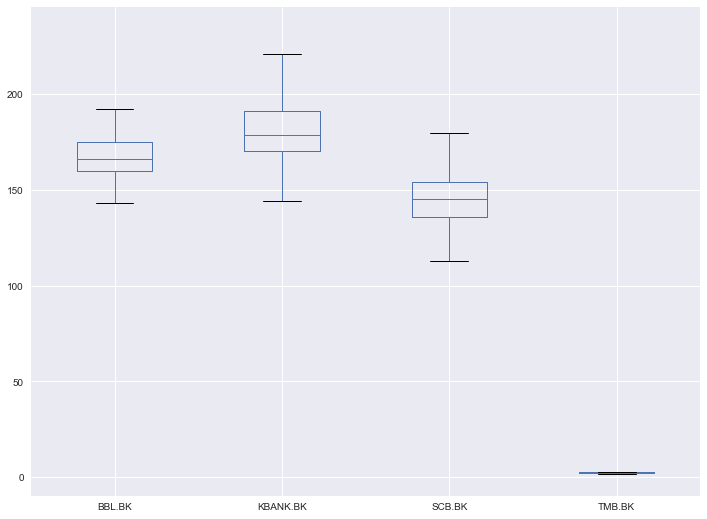

In [62]:
allstock.plot(kind='box', figsize=(12,9))

ดูค่า Histogram ของราคาปิดหุ้นแต่ละตัว

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10dc87d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10dfec320>]], dtype=object)

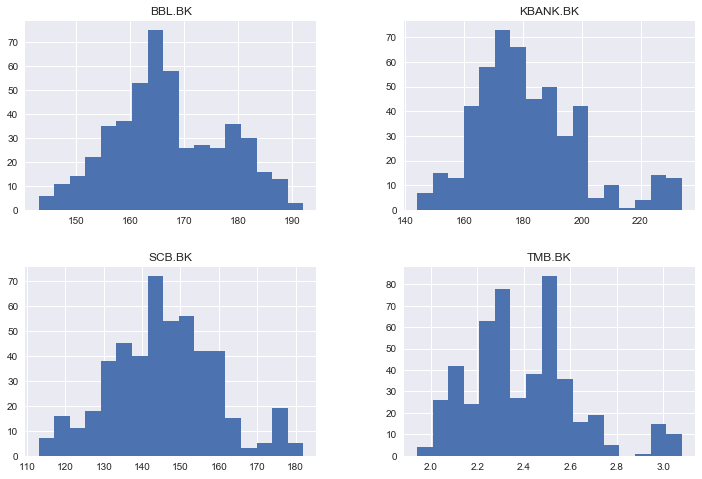

In [58]:
allstock.hist(bins=17,figsize=(12,8))

In [38]:
import scipy.stats as stats

ตรวจสอบค่า Probability plot ของราคาปิด

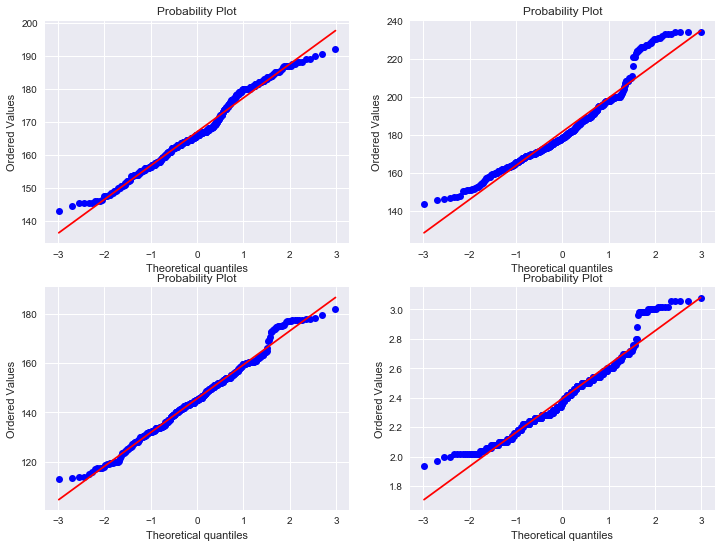

In [39]:
f= plt.figure(figsize=(12,9))
ax1= f.add_subplot(221)
stats.probplot(allstock[symbols[0]], dist='norm',plot=ax1)
ax2= f.add_subplot(222)
stats.probplot(allstock[symbols[1]], dist='norm',plot=ax2)
ax3= f.add_subplot(223)
stats.probplot(allstock[symbols[2]], dist='norm',plot=ax3)
ax4= f.add_subplot(224)
stats.probplot(allstock[symbols[3]], dist='norm',plot=ax4)
plt.show()

คำนวนหา Daily Return

In [40]:
Dataf1['DailyReturn']=Dataf1['Close'].pct_change(1)
Dataf2['DailyReturn']=Dataf2['Close'].pct_change(1)
Dataf3['DailyReturn']=Dataf3['Close'].pct_change(1)
Dataf4['DailyReturn']=Dataf4['Close'].pct_change(1)

ดึงเอาเฉพาะ Daily Return ของหุ้นแต่ละตัว

In [41]:
stockR1=Dataf1['DailyReturn']
stockR2=Dataf2['DailyReturn']
stockR3=Dataf3['DailyReturn']
stockR4=Dataf4['DailyReturn']

In [42]:
stockRAll=pd.concat([stockR1, stockR2, stockR3, stockR4],axis=1,
                    keys=[symbols[0],symbols[1], symbols[2],symbols[3]])

show ค่า Stats ของ Daily Return

In [51]:
stockRAll.describe()

,BBL.BK,KBANK.BK,SCB.BK,TMB.BK
count,487.000000,487.000000,487.000000,487.000000
mean,0.000033,-0.000224,-0.000184,-0.000292
std,0.013288,0.016072,0.016305,0.017087
min,-0.056426,-0.052910,-0.054152,-0.064935
25%,-0.008265,-0.009756,-0.010309,-0.008929
50%,0.000000,0.000000,0.000000,0.000000
75%,0.007237,0.008863,0.009901,0.008850
max,0.038710,0.059783,0.062271,0.067308


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b66f630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10c445a58>]], dtype=object)

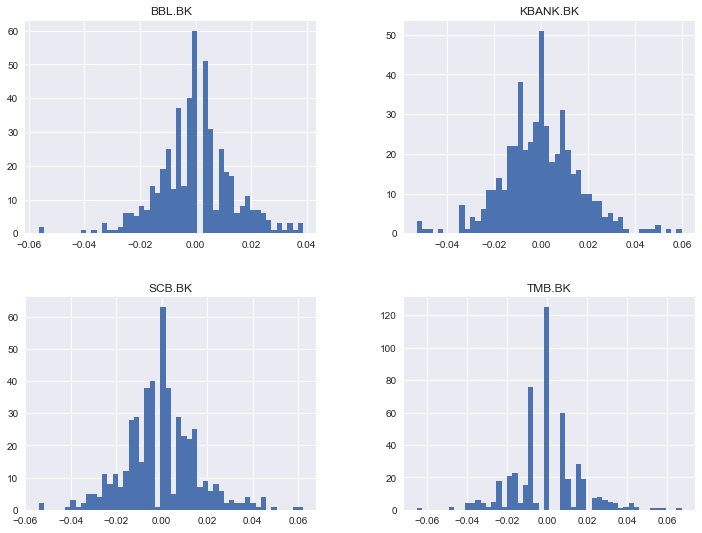

In [43]:
stockRAll.hist(bins=50,figsize=(12,9))

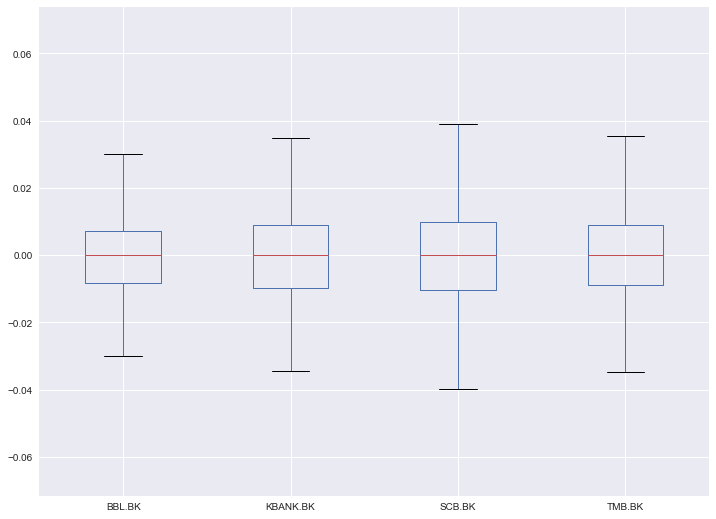

In [59]:
stockRAll.plot(kind='box', figsize=(12,9))

คำนวนหาค่า Cumulative Return

In [46]:
Dataf1['CummulativeReturn']=np.exp(np.log1p(Dataf1['DailyReturn']).cumsum())
Dataf2['CummulativeReturn']=np.exp(np.log1p(Dataf2['DailyReturn']).cumsum())
Dataf3['CummulativeReturn']=np.exp(np.log1p(Dataf3['DailyReturn']).cumsum())
Dataf4['CummulativeReturn']=np.exp(np.log1p(Dataf4['DailyReturn']).cumsum())

ดึงเอาเฉพาะCummulative Return ของหุ้นแต่ละตัว

In [47]:
stockA=Dataf1['CummulativeReturn']
stockB=Dataf2['CummulativeReturn']
stockC=Dataf3['CummulativeReturn']
stockD=Dataf4['CummulativeReturn']

In [48]:
stockAll= pd.concat([stockA, stockB, stockC, stockD],axis=1,
                    keys=[symbols[0],symbols[1], symbols[2],symbols[3]])

show ค่า Stats ของ Cumulative Return

In [52]:
stockAll.describe()

,BBL.BK,KBANK.BK,SCB.BK,TMB.BK
count,487.000000,487.000000,487.000000,487.000000
mean,0.892993,0.796273,0.815488,0.792560
std,0.054824,0.079137,0.076643,0.077010
min,0.764706,0.631579,0.633053,0.642384
25%,0.855615,0.745614,0.761905,0.741722
50%,0.887701,0.782895,0.812325,0.788079
75%,0.935829,0.837719,0.862745,0.841060
max,1.026738,1.026316,1.019608,1.019868


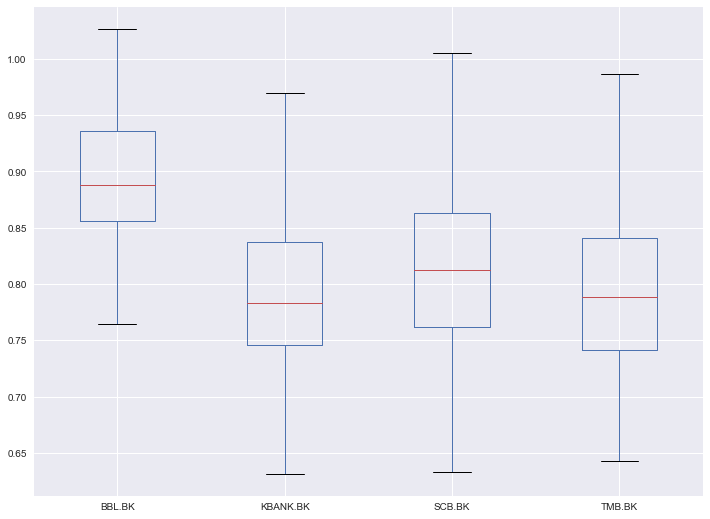

In [61]:
stockAll.plot(kind='box', figsize=(12,9))

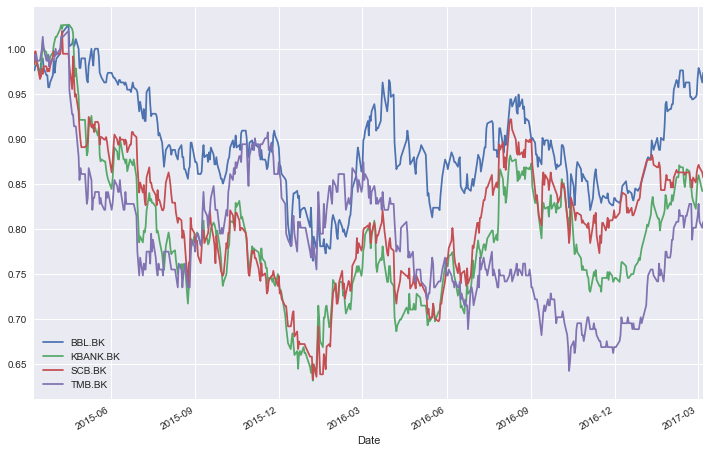

In [49]:
stockAll.plot(figsize=(12,8))